# Crack Detection Using CNN

#### >> LOADING TRAINING DATA

Training data shape: (14968, 224, 224)
Training labels shape: (14968,)
Showing Sample Training Data


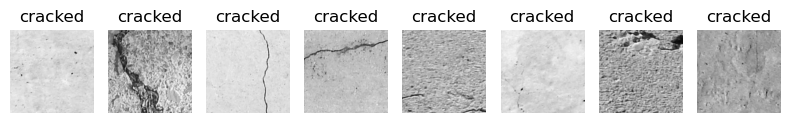

In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

path = r"C:\Users\PC\Desktop\Work\crack-detection-image-classification-2023\train"
folders = ["cracked","uncracked"]
img_size = 224
 
training_data = []
training_labels = []
 
for folder in folders:
    folder_path = os.path.join(path, folder)
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (img_size, img_size))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        training_data.append(img)
        training_labels.append(folders.index(folder))
         
training_data = np.array(training_data)
training_labels = np.array(training_labels)
 
print("Training data shape:", training_data.shape)
print("Training labels shape:", training_labels.shape)

def show_images(images, labels):
    fig, axes = plt.subplots(1, 8, figsize=(8, 8))
    axes = axes.ravel()
    for i in range(len(axes)):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(folders[labels[i]])
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

sample_images = training_data[:10]
sample_labels = training_labels[:10]
print("Showing Sample Training Data")
show_images(sample_images, sample_labels)

In [19]:
training_labels.shape

(14968,)

#### >> DEFINE MODEL AND TRAIN 

In [ ]:
input_shape = (img_size, img_size, 1)
 
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(folders), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(training_data, training_labels, epochs=1, validation_split=0.2)

243/375 [==================>...........] - ETA: 2:25:01 - loss: 8.5852 - accuracy: 0.6087

In [20]:
model

#### >> PREDICT LABELS FOR QUERY IMAGES

In [28]:
import os
import cv2
import numpy as np
import pandas as pd

test_path_new = r"C:\Users\PC\Desktop\Work\crack-detection-image-classification-2023\test"
img_size = 224
 
image_files = os.listdir(test_path_new)
query_images = []
for img_file in image_files:
    img_path = os.path.join(test_path_new, img_file)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (img_size, img_size))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    query_images.append(img)
    
query_images = np.array(query_images)
query_images = query_images.reshape(-1, img_size, img_size, 1)
 
predicted_labels = np.argmax(model.predict(query_images), axis=1)
predicted_labels = [folders[label] for label in predicted_labels]
 
results_df = pd.DataFrame({'Image': image_files, 'Predicted Label': predicted_labels})
results_df.to_csv(r'C:\Users\PC\Desktop\Work\test_results.csv', index=False)


63/63 [==============================] - 30s 481ms/step
